#SPAM SMS DETECTION

##
To build an AI model for classifying SMS messages as spam or legitimate, you can use algorithms like Logistic Regression, Naive Bayes, and Support Vector Machines. Start by preprocessing the text data with techniques like tokenization and removing stop words. Then, convert the text to numerical format using TF-IDF or Count Vectorizer, and train the models to classify the messages.

#IMPORT THE LIBRARIES

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import string
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#Load Dataset

In [19]:
import pandas as pd


data = pd.read_csv('/content/drive/MyDrive/codsoft internship/Task 4/spam.csv', encoding='latin-1')

In [20]:
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [21]:
data.describe().transpose()

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [22]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [23]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


(5572, 5)

In [24]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [25]:
data.value_counts()

v1   v2                                                                                                                                               Unnamed: 2                                                                    Unnamed: 3                                Unnamed: 4                                              
ham  Edison has rightly said, \A fool can ask more questions than a wise man can answer\" Now you know why all of us are speechless during ViVa.. GM  GN                                                                            GE                                        GNT:-)"                                                     2
     I just lov this line: \Hurt me with the truth                                                                                                     I don't mind                                                                 i wil tolerat.bcs ur my someone..... But   Never comfort me with a lie\" gud ni8 and sweet dreams"    1
     When

#Check Null Value

In [26]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [27]:
data.isnull().any()

v1            False
v2            False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

In [28]:
data.isnull().all()

v1            False
v2            False
Unnamed: 2    False
Unnamed: 3    False
Unnamed: 4    False
dtype: bool

#To drop columns Unnamed: 2, Unnamed: 3, and Unnamed: 4

In [29]:
print(data.columns)


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [30]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [31]:
data.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


#Rename V1 and V2

In [32]:
data=data.rename({'v1':'Class','v2':'Message'},axis=1)

In [33]:
data.head(10)

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [34]:
data.columns

Index(['Class', 'Message'], dtype='object')

#Data exploration to uncover insights

<Axes: xlabel='Class', ylabel='count'>

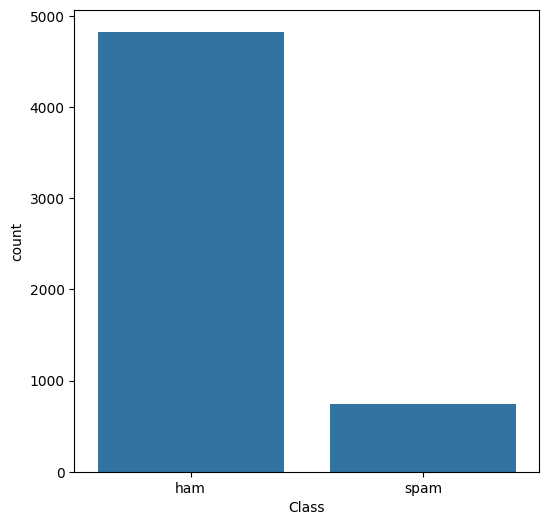

In [35]:
plt.figure(figsize=(6,6))

x= data.Class.value_counts()
sns.countplot(x= "Class",data= data)

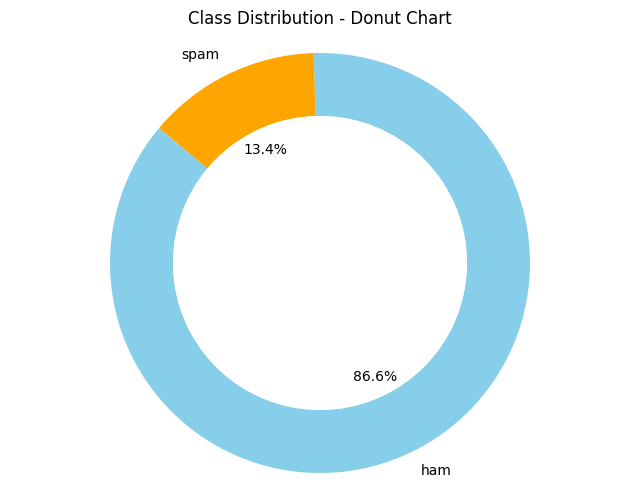

In [37]:
import matplotlib.pyplot as plt


class_counts = data['Class'].value_counts()


plt.figure(figsize=(8, 6))
colors = ['skyblue', 'orange']


plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'width': 0.3})


center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Class Distribution - Donut Chart')
plt.axis('equal')
plt.show()


In [40]:
!pip install squarify

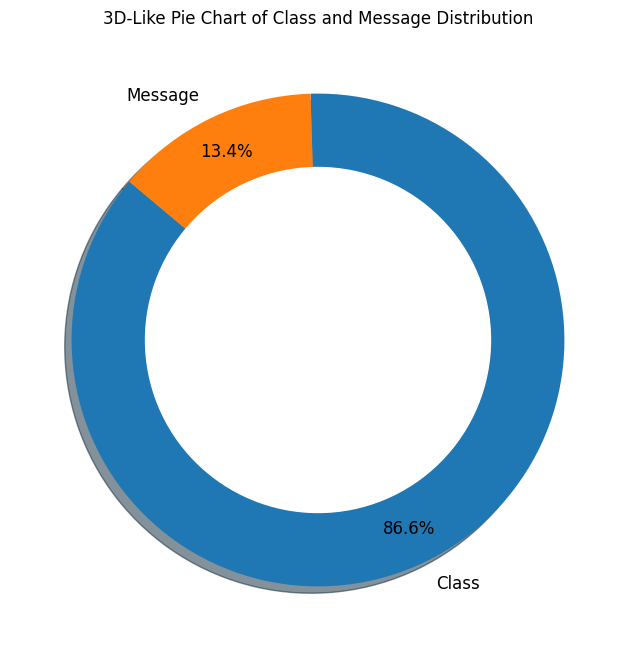

In [50]:
import matplotlib.pyplot as plt
import numpy as np


labels = ["Class", "Message"]
sizes = x.values


fig, ax = plt.subplots(figsize=(10, 8))


wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, shadow=True, pctdistance=0.85)


centre_circle = plt.Circle((0, 0), 0.70, color='white', fc='white')
fig.gca().add_artist(centre_circle)


for text in autotexts:
    text.set_color('black')
    text.set_fontsize(12)

for text in texts:
    text.set_color('black')
    text.set_fontsize(12)

plt.title('3D-Like Pie Chart of Class and Message Distribution')
plt.show()


In [67]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [70]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text

In [71]:
data['clean_text'] = data['Message'].apply(clean_text)
data.head(10)

,Class,Message,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling 3 week word back like fun ...
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aids patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,per request melle melle oru minnaminunginte nu...
8,spam,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,mobile 11 months u r entitled update latest co...


In [72]:
X = data['clean_text']
y = data['Class']

In [75]:
!pip install nltk
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt') # Download the 'punkt' resource for sentence tokenization

ps = PorterStemmer()
# Assuming 'clean_text' is a variable containing the text to be tokenized:
text_to_tokenize = "This is an example sentence." # Replace with your actual text
words = word_tokenize(text_to_tokenize)

print(words)

['This', 'is', 'an', 'example', 'sentence', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [76]:
from sklearn.feature_extraction.text import CountVectorizer

In [77]:
def message_text_process(mess):
    # Check characters to see if there are punctuations
    no_punctuation=[char for char in mess if char not in string.punctuation]
    # now form the sentence
    no_punctuation=''.join(no_punctuation)
    # Now eliminate any stopwords
    return[word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]

In [78]:
data['Message'].head(5).apply(message_text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
bag_of_words_transformer=CountVectorizer(analyzer=message_text_process).fit(data['Message'])
print(len(bag_of_words_transformer.vocabulary_))


11304


In [81]:
message_bagofwords=bag_of_words_transformer.transform(data['Message'])
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(message_bagofwords)


In [82]:
message_tfidf=tfidf_transformer.transform(message_bagofwords)
print(message_tfidf.shape)

(5572, 11304)


In [83]:
from sklearn.naive_bayes import MultinomialNB
spam_detection_model=MultinomialNB().fit(message_tfidf,data['Class'])

In [84]:
message=data['Message'][4]
bag_of_words_for_message=bag_of_words_transformer.transform([message])
tfidf=tfidf_transformer.transform(bag_of_words_for_message)

print('predicted',spam_detection_model.predict(tfidf)[0])

predicted ham


In [85]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [86]:
message=data['Message'][4]
# check model for prediction and expected value say for message#2 and message#5
bag_of_words_for_message=bag_of_words_transformer.transform([message])
tfidf=tfidf_transformer.transform(bag_of_words_for_message)

print('predicted',spam_detection_model.predict(tfidf)[0])

predicted ham


In [87]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

def Model(model, X, y):
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

    # Build the pipeline with CountVectorizer, TfidfTransformer, and the model
    pipeline_model = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', model)
    ])

    # Train the pipeline
    pipeline_model.fit(x_train, y_train)

    # Make predictions and get probabilities
    y_pred = pipeline_model.predict(x_test)
    y_probas = pipeline_model.predict_proba(x_test)[:, 1]  # Assuming binary classification

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_probas)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 8))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_probas)

    plt.figure(figsize=(12, 8))
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

    # Print confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Print accuracy scores
    print('Test Accuracy:', pipeline_model.score(x_test, y_test) * 100)
    print("Training Accuracy:", pipeline_model.score(x_train, y_train) * 100)


#Model Building

#Using SVM

In [95]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = SVC(probability=True)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Training Score Accuracy
train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")


Accuracy: 1.00
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Training Accuracy: 0.96


In [98]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Training Score Accuracy
train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")


Accuracy: 0.98
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Training Accuracy: 0.94


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Training Score Accuracy
train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")


Accuracy: 1.00
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Training Accuracy: 0.96


In [100]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    'SVM': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Store the results
    results[name] = {
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    }

# Print results and determine the best model
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
print(f"Best Model: {best_model_name}")

print(f"\n{best_model_name} Performance:")
print(f"Accuracy: {results[best_model_name]['accuracy']:.2f}")
print("Confusion Matrix:\n", results[best_model_name]['confusion_matrix'])
print("Classification Report:\n", results[best_model_name]['classification_report'])


Best Model: SVM

SVM Performance:
Accuracy: 1.00
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

